In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [2]:
tagsCount = pd.read_csv("SMPdata/imageIDandTagsCount.csv")
imageInformation = pd.read_csv("SMPdata/image_information.txt",skiprows=[765,768]).astype("int")
label = pd.read_csv("train_all_json/train_label.txt")
trainData = pd.concat( [tagsCount , label], axis=1 )
qooSortData = pd.read_csv("SMPdata/train.csv")
detectObject = pd.read_csv("SMPdata/imageDetectObject.csv",index_col = "Unnamed: 0")
#print(label.loc[1])
#print(qooSortData)
#print(label.loc[tagsCount[tagsCount["imageID"]==385070026].index])
#detectObject

### test other type tags count

for i in range(len(tagsCount)):
    tagsCount.loc[i,"TagsCount"] = round(sqrt(tagsCount.loc[i,"TagsCount"]))
    if i%3000==0:
        print(i)
tagsCount

In [3]:
trainData = pd.merge(imageInformation, trainData, how='left', on='imageID')
#print(trainData.shape)

In [4]:
trainDataII = qooSortData[["image","Uid","Concept"]]
#print(trainDataII)
trainDataII["Uid_code"] = LabelEncoder().fit_transform(trainDataII["Uid"])
trainDataII["Concept_code"] = LabelEncoder().fit_transform(trainDataII["Concept"])
trainDataII.drop(columns = ["Uid","Concept"],inplace=True)
trainDataII.columns = ["imageID","Uid_code","Concept_code"]
#print(trainDataII)
#qooSortData

/anaconda3/envs/testtensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/testtensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/testtensorflow/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [5]:
train = pd.merge(trainDataII, trainData, how="inner", on="imageID")
train

,imageID,Uid_code,Concept_code,ViewCount,JoinFavoriteCount,LeaveMessageCount,TagsCount,score
0,385070026,28628,254,5719,4,2,12.0,11.18
1,943750056,2619,200,49403,31,32,65.0,15.15
2,3246928439,13086,105,3455,8,1,23.0,10.99
3,3432316502,30463,426,615,1,4,9.0,8.63
4,3538960847,1752,602,3980,57,10,19.0,11.16
5,3544037429,1752,212,13405,22,3,37.0,12.74
6,3544739218,1752,212,8099,13,2,37.0,11.46
7,3544861110,1752,212,3235,6,0,37.0,10.62
8,3544891702,1752,212,21131,41,7,37.0,14.24
9,4298739132,30462,170,147,0,0,22.0,6.51


train = pd.merge(train, detectObject, how="inner", on="imageID")
train

imageScore = pd.read_csv("SMPdata/train_image_score.csv")
imageScore.columns = ["imageID","imageScore"]
train = pd.merge(train, imageScore, how="inner", on="imageID")
train

In [6]:
a , X_test= train_test_split(train, test_size=0.2)
X_train , X_valid = train_test_split(a,test_size=0.1)
Y_train = X_train["score"]
X_train = X_train.drop(["score"],axis = 1)
Y_test = X_test["score"]
X_test = X_test.drop(["score"],axis = 1)
Y_valid = X_valid["score"]
X_valid = X_valid.drop(["score"],axis = 1)

In [7]:
model = XGBRegressor(
    max_depth=9,
    n_estimators=1000,
    min_child_weight=1, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,    
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 15)


/anaconda3/envs/testtensorflow/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/anaconda3/envs/testtensorflow/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	validation_0-rmse:5.7499	validation_1-rmse:5.72865
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:5.1841	validation_1-rmse:5.16611
[2]	validation_0-rmse:4.67746	validation_1-rmse:4.66275
[3]	validation_0-rmse:4.22527	validation_1-rmse:4.21335
[4]	validation_0-rmse:3.81637	validation_1-rmse:3.80769
[5]	validation_0-rmse:3.44671	validation_1-rmse:3.44037
[6]	validation_0-rmse:3.11489	validation_1-rmse:3.11095
[7]	validation_0-rmse:2.82192	validation_1-rmse:2.81989
[8]	validation_0-rmse:2.55462	validation_1-rmse:2.55439
[9]	validation_0-rmse:2.31548	validation_1-rmse:2.31724
[10]	validation_0-rmse:2.10149	validation_1-rmse:2.10518
[11]	validation_0-rmse:1.91056	validation_1-rmse:1.91599
[12]	validation_0-rmse:1.74101	validation_1-rmse:1.74818
[13]	validation_0-rmse:1.58863	validation_1-rmse:1.59737
[14]	validation_0-rmse:1.45421	validation_1-rmse:1.4645

[137]	validation_0-rmse:0.447517	validation_1-rmse:0.518873
[138]	validation_0-rmse:0.447128	validation_1-rmse:0.518649
[139]	validation_0-rmse:0.446827	validation_1-rmse:0.518433
[140]	validation_0-rmse:0.446385	validation_1-rmse:0.518164
[141]	validation_0-rmse:0.446137	validation_1-rmse:0.518179
[142]	validation_0-rmse:0.445828	validation_1-rmse:0.518116
[143]	validation_0-rmse:0.44548	validation_1-rmse:0.517996
[144]	validation_0-rmse:0.444897	validation_1-rmse:0.517836
[145]	validation_0-rmse:0.444429	validation_1-rmse:0.517543
[146]	validation_0-rmse:0.44399	validation_1-rmse:0.517514
[147]	validation_0-rmse:0.443438	validation_1-rmse:0.517135
[148]	validation_0-rmse:0.4428	validation_1-rmse:0.516629
[149]	validation_0-rmse:0.442185	validation_1-rmse:0.516309
[150]	validation_0-rmse:0.441478	validation_1-rmse:0.515939
[151]	validation_0-rmse:0.440843	validation_1-rmse:0.515783
[152]	validation_0-rmse:0.440528	validation_1-rmse:0.515624
[153]	validation_0-rmse:0.44041	validation_1

[275]	validation_0-rmse:0.393498	validation_1-rmse:0.49152
[276]	validation_0-rmse:0.392828	validation_1-rmse:0.491124
[277]	validation_0-rmse:0.39274	validation_1-rmse:0.491113
[278]	validation_0-rmse:0.392596	validation_1-rmse:0.491074
[279]	validation_0-rmse:0.392041	validation_1-rmse:0.490929
[280]	validation_0-rmse:0.391709	validation_1-rmse:0.490585
[281]	validation_0-rmse:0.391539	validation_1-rmse:0.490603
[282]	validation_0-rmse:0.391285	validation_1-rmse:0.490547
[283]	validation_0-rmse:0.390894	validation_1-rmse:0.490282
[284]	validation_0-rmse:0.390692	validation_1-rmse:0.490214
[285]	validation_0-rmse:0.390372	validation_1-rmse:0.49007
[286]	validation_0-rmse:0.39002	validation_1-rmse:0.489951
[287]	validation_0-rmse:0.389621	validation_1-rmse:0.489787
[288]	validation_0-rmse:0.38951	validation_1-rmse:0.489709
[289]	validation_0-rmse:0.38922	validation_1-rmse:0.489507
[290]	validation_0-rmse:0.388991	validation_1-rmse:0.489394
[291]	validation_0-rmse:0.388573	validation_1-

[413]	validation_0-rmse:0.354917	validation_1-rmse:0.475077
[414]	validation_0-rmse:0.354555	validation_1-rmse:0.474966
[415]	validation_0-rmse:0.354234	validation_1-rmse:0.47488
[416]	validation_0-rmse:0.35408	validation_1-rmse:0.474815
[417]	validation_0-rmse:0.353735	validation_1-rmse:0.474586
[418]	validation_0-rmse:0.353508	validation_1-rmse:0.474468
[419]	validation_0-rmse:0.35316	validation_1-rmse:0.474304
[420]	validation_0-rmse:0.352939	validation_1-rmse:0.474187
[421]	validation_0-rmse:0.352717	validation_1-rmse:0.474081
[422]	validation_0-rmse:0.352581	validation_1-rmse:0.474091
[423]	validation_0-rmse:0.352239	validation_1-rmse:0.473937
[424]	validation_0-rmse:0.352061	validation_1-rmse:0.47393
[425]	validation_0-rmse:0.351707	validation_1-rmse:0.473663
[426]	validation_0-rmse:0.35156	validation_1-rmse:0.473621
[427]	validation_0-rmse:0.35128	validation_1-rmse:0.473613
[428]	validation_0-rmse:0.35065	validation_1-rmse:0.473393
[429]	validation_0-rmse:0.350468	validation_1-r

[551]	validation_0-rmse:0.325281	validation_1-rmse:0.465
[552]	validation_0-rmse:0.325207	validation_1-rmse:0.464967
[553]	validation_0-rmse:0.325052	validation_1-rmse:0.464923
[554]	validation_0-rmse:0.324914	validation_1-rmse:0.464884
[555]	validation_0-rmse:0.32482	validation_1-rmse:0.464834
[556]	validation_0-rmse:0.324625	validation_1-rmse:0.464782
[557]	validation_0-rmse:0.324428	validation_1-rmse:0.464687
[558]	validation_0-rmse:0.324315	validation_1-rmse:0.464677
[559]	validation_0-rmse:0.324243	validation_1-rmse:0.464674
[560]	validation_0-rmse:0.324177	validation_1-rmse:0.464666
[561]	validation_0-rmse:0.324035	validation_1-rmse:0.464637
[562]	validation_0-rmse:0.323936	validation_1-rmse:0.464599
[563]	validation_0-rmse:0.323689	validation_1-rmse:0.464511
[564]	validation_0-rmse:0.323461	validation_1-rmse:0.464541
[565]	validation_0-rmse:0.323273	validation_1-rmse:0.464436
[566]	validation_0-rmse:0.323182	validation_1-rmse:0.464428
[567]	validation_0-rmse:0.322749	validation_

[688]	validation_0-rmse:0.300286	validation_1-rmse:0.456885
[689]	validation_0-rmse:0.300071	validation_1-rmse:0.456866
[690]	validation_0-rmse:0.299778	validation_1-rmse:0.456718
[691]	validation_0-rmse:0.299687	validation_1-rmse:0.456675
[692]	validation_0-rmse:0.299582	validation_1-rmse:0.456672
[693]	validation_0-rmse:0.299505	validation_1-rmse:0.456672
[694]	validation_0-rmse:0.299451	validation_1-rmse:0.456608
[695]	validation_0-rmse:0.299408	validation_1-rmse:0.456573
[696]	validation_0-rmse:0.2993	validation_1-rmse:0.456548
[697]	validation_0-rmse:0.299249	validation_1-rmse:0.456552
[698]	validation_0-rmse:0.29898	validation_1-rmse:0.456531
[699]	validation_0-rmse:0.298883	validation_1-rmse:0.456511
[700]	validation_0-rmse:0.298838	validation_1-rmse:0.456485
[701]	validation_0-rmse:0.298756	validation_1-rmse:0.456439
[702]	validation_0-rmse:0.29863	validation_1-rmse:0.456375
[703]	validation_0-rmse:0.298367	validation_1-rmse:0.456281
[704]	validation_0-rmse:0.298029	validation_

[826]	validation_0-rmse:0.280439	validation_1-rmse:0.45105
[827]	validation_0-rmse:0.280242	validation_1-rmse:0.451029
[828]	validation_0-rmse:0.280138	validation_1-rmse:0.451029
[829]	validation_0-rmse:0.280073	validation_1-rmse:0.451003
[830]	validation_0-rmse:0.279902	validation_1-rmse:0.450949
[831]	validation_0-rmse:0.279822	validation_1-rmse:0.45092
[832]	validation_0-rmse:0.279623	validation_1-rmse:0.451003
[833]	validation_0-rmse:0.279395	validation_1-rmse:0.450903
[834]	validation_0-rmse:0.27923	validation_1-rmse:0.450864
[835]	validation_0-rmse:0.279129	validation_1-rmse:0.450804
[836]	validation_0-rmse:0.279049	validation_1-rmse:0.450782
[837]	validation_0-rmse:0.278932	validation_1-rmse:0.450764
[838]	validation_0-rmse:0.27879	validation_1-rmse:0.45076
[839]	validation_0-rmse:0.278637	validation_1-rmse:0.450629
[840]	validation_0-rmse:0.278517	validation_1-rmse:0.450645
[841]	validation_0-rmse:0.278439	validation_1-rmse:0.450622
[842]	validation_0-rmse:0.278372	validation_1

[963]	validation_0-rmse:0.263902	validation_1-rmse:0.446989
[964]	validation_0-rmse:0.263839	validation_1-rmse:0.446965
[965]	validation_0-rmse:0.263782	validation_1-rmse:0.446978
[966]	validation_0-rmse:0.263653	validation_1-rmse:0.44698
[967]	validation_0-rmse:0.26363	validation_1-rmse:0.447003
[968]	validation_0-rmse:0.263544	validation_1-rmse:0.446952
[969]	validation_0-rmse:0.263421	validation_1-rmse:0.446925
[970]	validation_0-rmse:0.263299	validation_1-rmse:0.446862
[971]	validation_0-rmse:0.263199	validation_1-rmse:0.446843
[972]	validation_0-rmse:0.263128	validation_1-rmse:0.446843
[973]	validation_0-rmse:0.262927	validation_1-rmse:0.446785
[974]	validation_0-rmse:0.262871	validation_1-rmse:0.44677
[975]	validation_0-rmse:0.262668	validation_1-rmse:0.446647
[976]	validation_0-rmse:0.26256	validation_1-rmse:0.446616
[977]	validation_0-rmse:0.262508	validation_1-rmse:0.446616
[978]	validation_0-rmse:0.262438	validation_1-rmse:0.446584
[979]	validation_0-rmse:0.262288	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.8, eta=0.1, gamma=0, importance_type='gain',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
             subsample=0.8)

In [8]:
Y_pred = model.predict(X_test).clip(0, 20)
print(Y_pred)
print(Y_pred[2])

[ 6.37908    5.9823318  5.7067547 ... 16.263454   6.6113753 10.162957 ]
5.7067547


In [9]:
print(type(Y_test))
print(Y_test)
print(Y_test.values[2])

<class 'pandas.core.series.Series'>
206562     6.64
108537     6.44
256251     5.78
261805     5.70
40752      9.10
129660     5.13
222735     9.64
197934     4.46
2066       7.58
74990     10.95
71799     11.76
137816     4.09
69648      5.73
19293      6.44
4521       6.77
102626     7.77
97949      7.01
117440     9.90
223878     2.58
68971      5.98
107454     4.25
246465     3.32
148873     6.46
130268     5.09
248889     3.81
44814      6.21
176126     7.97
1246       7.29
174215     7.19
37671      5.21
          ...  
118859     7.23
176563     1.00
193780    10.70
116885     3.81
56951      7.47
94016      7.89
81280      8.65
126964     6.70
194347     4.95
44109      5.73
32368      8.69
188853     8.41
15991     10.21
60078      7.81
268665     4.91
176986     6.34
131880     4.81
123575     6.15
149689     8.16
233888     2.81
207830     8.67
242490     4.95
99576      5.52
28397     13.76
83417      8.46
149305    11.59
208609     6.52
11895     16.41
157908     6.58
1986

In [10]:
error = []
for i in range(len(Y_test)):
    error.append(Y_test.values[i] - Y_pred[i])
    
#print("Errors: ", error)
#print(error)
squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#平方
    absError.append(abs(val))#誤差絕對值
    
#print("Square Error: ", squaredError)
#print("Absolute Value of Error: ", absError)
print("MSE = ", sum(squaredError) / len(squaredError))#平均平方誤差MSE


#from math import sqrt
#print("RMSE = ", sqrt(sum(squaredError) / len(squaredError)))#平均平方根誤差RMSE
print("MAE = ", sum(absError) / len(absError))#平均絕對誤差MAE

MSE =  0.20423668713807955
MAE =  0.2662461571350072


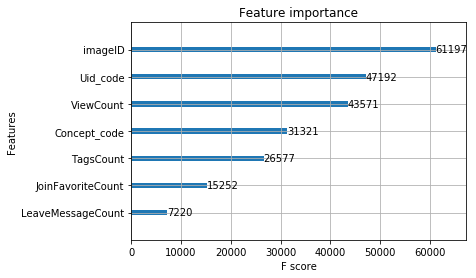

In [11]:
plot_importance(model)
plt.show()